**Uploading the data file**

In [1]:
from google.colab import files

uploaded = files.upload()


for fn in uploaded.keys():

  print('User uploaded file "{name}" with length {length} bytes'.format(

name=fn, length=len(uploaded[fn])))

Saving Covid Dataset.csv to Covid Dataset.csv
User uploaded file "Covid Dataset.csv" with length 405339 bytes


**Library for working with dataset**

In [39]:
import pandas as pd
import numpy as np
import os

**Library for data visualization**

In [40]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

**Machine learning algorithms**

In [41]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree

**Importing dataset**

In [42]:
Covid19= pd.read_csv (r'/content/Covid Dataset.csv')

**Checking for the NA(Missing values) in the dataset**

In [6]:
Covid19.isna().sum()

Breathing Problem                          0
Fever                                      0
Dry Cough                                  0
Sore throat                                0
Running Nose                               0
Asthma                                     0
Chronic Lung Disease                       0
Headache                                   0
Heart Disease                              0
Diabetes                                   0
Hyper Tension                              0
Fatigue                                    0
Gastrointestinal                           0
Abroad travel                              0
Contact with COVID Patient                 0
Attended Large Gathering                   0
Visited Public Exposed Places              0
Family working in Public Exposed Places    0
Wearing Masks                              0
Sanitization from Market                   0
COVID-19                                   0
dtype: int64

With above we noticed that there are no missing values in our dataset

In [43]:
Covid19.describe(include='all')

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,Hyper Tension,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
count,5434,5434,5434,5434,5434,5434,5434,5434,5434,5434,5434,5434,5434,5434,5434,5434,5434,5434,5434,5434,5434
unique,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,2
top,Yes,Yes,Yes,Yes,Yes,No,No,Yes,No,No,No,Yes,No,No,Yes,No,Yes,No,No,No,Yes
freq,3620,4273,4307,3953,2952,2920,2869,2736,2911,2846,2771,2821,2883,2983,2726,2924,2820,3172,5434,5434,4383


From above command we can see the variable counts as well as frequency of all dichotomous variables. In our dataset all variables are dichotomous.

In [8]:
Covid19.columns

Index(['Breathing Problem', 'Fever', 'Dry Cough', 'Sore throat',
       'Running Nose', 'Asthma', 'Chronic Lung Disease', 'Headache',
       'Heart Disease', 'Diabetes', 'Hyper Tension', 'Fatigue ',
       'Gastrointestinal ', 'Abroad travel', 'Contact with COVID Patient',
       'Attended Large Gathering', 'Visited Public Exposed Places',
       'Family working in Public Exposed Places', 'Wearing Masks',
       'Sanitization from Market', 'COVID-19'],
      dtype='object')

**Dichotomous variable distribution**

In [9]:
Covid19[["Breathing Problem", "Fever", "Dry Cough", "Sore throat","Running Nose", "Asthma", "Chronic Lung Disease", "Headache","Heart Disease", "Diabetes", "Hyper Tension", "Fatigue ","Gastrointestinal ", "Abroad travel", "Contact with COVID Patient","Attended Large Gathering", "Visited Public Exposed Places","Family working in Public Exposed Places", "Wearing Masks","Sanitization from Market", "COVID-19"]].apply(lambda x: x.value_counts()).T.stack()

Breathing Problem                        No     1814.0
                                         Yes    3620.0
Fever                                    No     1161.0
                                         Yes    4273.0
Dry Cough                                No     1127.0
                                         Yes    4307.0
Sore throat                              No     1481.0
                                         Yes    3953.0
Running Nose                             No     2482.0
                                         Yes    2952.0
Asthma                                   No     2920.0
                                         Yes    2514.0
Chronic Lung Disease                     No     2869.0
                                         Yes    2565.0
Headache                                 No     2698.0
                                         Yes    2736.0
Heart Disease                            No     2911.0
                                         Yes    2523.0
Diabetes  

Above we can see the distribution of all variables. We can see from above that we have only one value for Wearing mask as well as for Sanitization from market. Due to this, this variables do not provide us any useful information. hence we will drop this 2 variables.

**Removing variables with no useful information**

In [44]:
Covid19=Covid19.drop('Wearing Masks',axis=1)
Covid19=Covid19.drop('Sanitization from Market',axis=1)

In [13]:
Covid19

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,Hyper Tension,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,COVID-19
0,Yes,Yes,Yes,Yes,Yes,No,No,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,Yes,Yes
1,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,No,Yes,No,No,No,Yes,Yes,No,Yes
2,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,No,Yes,Yes,Yes,No,No,No,No,Yes
3,Yes,Yes,Yes,No,No,Yes,No,No,Yes,Yes,No,No,No,Yes,No,Yes,Yes,No,Yes
4,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,Yes,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5429,Yes,Yes,No,Yes,Yes,Yes,Yes,No,No,No,No,Yes,Yes,No,No,No,No,No,Yes
5430,Yes,Yes,Yes,No,Yes,Yes,No,Yes,No,Yes,Yes,Yes,No,No,No,No,No,No,Yes
5431,Yes,Yes,Yes,No,No,No,No,No,Yes,No,Yes,No,No,No,No,No,No,No,No
5432,Yes,Yes,Yes,No,Yes,No,No,Yes,Yes,No,No,No,No,No,No,No,No,No,No


In [45]:
from sklearn.preprocessing import LabelEncoder
e=LabelEncoder()

In [47]:
##Transforming the dataframe values from string values of 'yes' and 'no' to int values '1' and '0' so we can use same for ML modelling
Covid19['Breathing Problem']=e.fit_transform(Covid19['Breathing Problem'])
Covid19['Fever']=e.fit_transform(Covid19['Fever'])
Covid19['Dry Cough']=e.fit_transform(Covid19['Dry Cough'])
Covid19['Sore throat']=e.fit_transform(Covid19['Sore throat'])
Covid19['Running Nose']=e.fit_transform(Covid19['Running Nose'])
Covid19['Asthma']=e.fit_transform(Covid19['Asthma'])
Covid19['Chronic Lung Disease']=e.fit_transform(Covid19['Chronic Lung Disease'])
Covid19['Headache']=e.fit_transform(Covid19['Headache'])
Covid19['Heart Disease']=e.fit_transform(Covid19['Heart Disease'])
Covid19['Diabetes']=e.fit_transform(Covid19['Diabetes'])
Covid19['Hyper Tension']=e.fit_transform(Covid19['Hyper Tension'])
Covid19['Abroad travel']=e.fit_transform(Covid19['Abroad travel'])
Covid19['Contact with COVID Patient']=e.fit_transform(Covid19['Contact with COVID Patient'])
Covid19['Attended Large Gathering']=e.fit_transform(Covid19['Attended Large Gathering'])
Covid19['Visited Public Exposed Places']=e.fit_transform(Covid19['Visited Public Exposed Places'])
Covid19['Family working in Public Exposed Places']=e.fit_transform(Covid19['Family working in Public Exposed Places'])
Covid19['COVID-19']=e.fit_transform(Covid19['COVID-19'])
Covid19['Gastrointestinal ']=e.fit_transform(Covid19['Gastrointestinal '])
Covid19['Fatigue ']=e.fit_transform(Covid19['Fatigue '])

In [48]:
corr=Covid19.corr()
corr.style.background_gradient(cmap='coolwarm',axis=None)

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,Hyper Tension,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,COVID-19
Breathing Problem,1.000000,0.089903,0.159562,0.303768,0.055190,0.075318,-0.098291,-0.062172,-0.073366,0.055427,0.045256,0.000561,-0.075390,0.117795,0.214634,0.200304,0.066688,0.018295,0.443764
Fever,0.089903,1.000000,0.127580,0.322235,0.081758,0.073953,-0.025160,-0.035416,-0.031462,0.050286,0.079001,-0.060458,-0.008067,0.128726,0.164704,0.070490,0.002252,0.012102,0.352891
Dry Cough,0.159562,0.127580,1.000000,0.213907,-0.030763,0.086843,-0.043664,-0.035912,0.047566,-0.006593,0.081989,-0.039909,0.008251,0.331418,0.128330,0.117963,0.086176,0.163102,0.464292
Sore throat,0.303768,0.322235,0.213907,1.000000,0.039450,0.081377,-0.050440,-0.015971,0.002177,0.001938,0.042811,-0.023290,0.025886,0.205986,0.189251,0.216438,0.079055,0.104378,0.502848
Running Nose,0.055190,0.081758,-0.030763,0.039450,1.000000,-0.022763,-0.014376,0.068479,-0.056750,0.042961,-0.020445,0.007026,-0.014673,0.034526,0.003776,0.061099,0.032568,-0.061323,-0.005657
Asthma,0.075318,0.073953,0.086843,0.081377,-0.022763,1.000000,-0.033771,0.037064,0.076783,-0.012060,0.017707,0.006564,0.101909,0.068286,0.005046,-0.044592,0.020941,-0.115679,0.089930
Chronic Lung Disease,-0.098291,-0.025160,-0.043664,-0.050440,-0.014376,-0.033771,1.000000,-0.050480,-0.039860,0.046789,-0.010331,-0.047655,-0.050333,-0.088854,-0.062482,-0.020548,-0.093049,0.038343,-0.056837
Headache,-0.062172,-0.035416,-0.035912,-0.015971,0.068479,0.037064,-0.050480,1.000000,0.048471,0.032390,-0.207489,0.052035,0.097778,0.043589,-0.082101,-0.162992,-0.005790,-0.012625,-0.027793
Heart Disease,-0.073366,-0.031462,0.047566,0.002177,-0.056750,0.076783,-0.039860,0.048471,1.000000,-0.032956,0.049139,-0.058925,0.004121,-0.020761,-0.025593,-0.045437,0.086169,0.035000,0.027072
Diabetes,0.055427,0.050286,-0.006593,0.001938,0.042961,-0.012060,0.046789,0.032390,-0.032956,1.000000,0.042543,-0.043903,0.040651,0.039013,-0.085696,-0.061650,-0.078212,0.097696,0.040627


Looking at above correlation matrix we can see that Presence of Covid 19 virus could be explained using variables Breathing Problem, Fever, Dry Cough, Sore throat which we can say that are the symtomatic character of the virus. Also when it comes to causality of the Covid 19 virus we can see that major variables Abroad travel, contact with COVID patient, Attended large gathering, Visited Public Exposed Places, and Family working in Public Exposed Places seem to appear as very strong explanatory variables.

**Data Visualization**

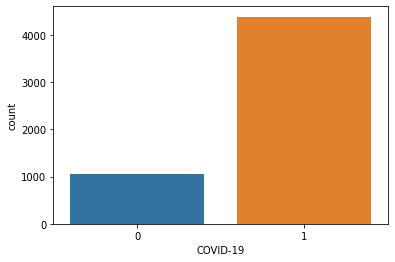

In [49]:
sns.countplot(x='COVID-19',data=Covid19)

With help seaborn library we can visualize distribution of population those who got Covid and those who didn't.

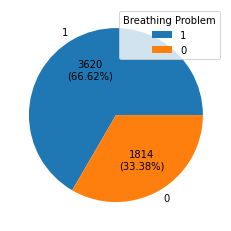

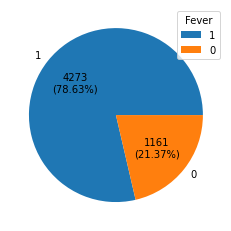

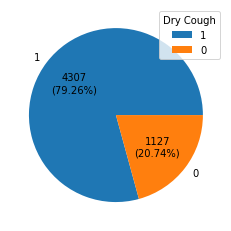

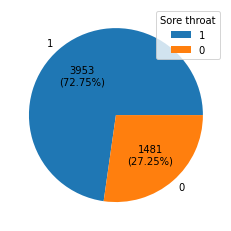

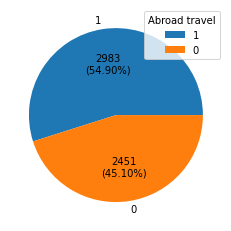

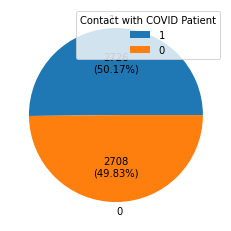

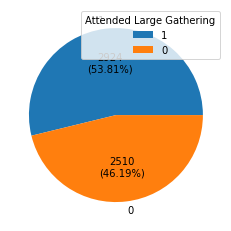

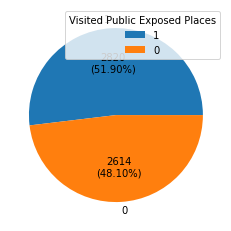

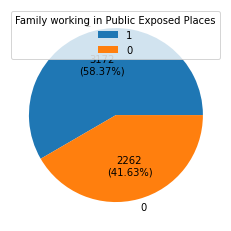

In [50]:
def pie_chart(Covid19, col, labels):
    data = Covid19[col].value_counts().to_numpy()
    def absolute_value(val):
        a  = np.round(val / 100 * data.sum(), 0)
        return str('%0.0f' % a) + '\n(' + ('%0.2f' % val) + '%)'
    plt.pie(data, labels = labels, autopct=absolute_value)
    plt.legend(title=col)
    plt.show() 

pie_chart(Covid19, 'Breathing Problem', [1, 0])
pie_chart(Covid19, 'Fever', [1, 0])
pie_chart(Covid19,'Dry Cough',[1, 0])
pie_chart(Covid19,'Sore throat',[1, 0])
pie_chart(Covid19,'Abroad travel',[1, 0])
pie_chart(Covid19,'Contact with COVID Patient',[1, 0])
pie_chart(Covid19,'Attended Large Gathering',[1, 0])
pie_chart(Covid19,'Visited Public Exposed Places',[1, 0])
pie_chart(Covid19,'Family working in Public Exposed Places',[1, 0])


From above pie chart we can visualize the population distribution of my selected independent variables based on population who is suffering from Covid 19 (COVID-19 = 1) and those who are not (COVID-19 = 0)

**Modelling**

For my modelling technique , I am going to use 3 ML algorithm techniques those are as mentioned below:

1. Logistic Regression
2. Random Forest
3. Decision Tree

Based on the result which I will be obtaining I would go for the best model which will be fit for my data. Based on this it would be easy to predict the covid spread based on our explanatory variables

**Splitting data into Train and Test**

In [51]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn import

In [52]:
#Dropping the variables from the dataset which are not strongly correalted with my dependent variable
x=Covid19.drop(columns = ['Running Nose','Asthma','Chronic Lung Disease','Headache','Heart Disease','Diabetes','Hyper Tension','Fatigue ','Gastrointestinal ','COVID-19'])
y=Covid19['COVID-19']

In [53]:
#Splitting dataset to 70:30 ratio as per the rule of dataset has less than 10,000 records
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30)

**Logistic Regression Model**

In [93]:
from sklearn.linear_model import LogisticRegression
Logistic_model = LogisticRegression()
#Fit the model
Logistic_model.fit(x_train, y_train)
y_pred = Logistic_model.predict(x_test)
#Score/Accuracy
Acc_LogReg=Logistic_model.score(x_test, y_test)*100
Acc_LogReg

96.99570815450643

**Random Forest Model**

In [91]:
#Train the model
from sklearn.ensemble import RandomForestRegressor
RandomForest_model = RandomForestRegressor(n_estimators=1000)

#Fit
RandomForest_model.fit(x_train, y_train)
y_pred=RandomForest_model.predict(x_test)
#Score/Accuracy
Acc_RandomForest=RandomForest_model.score(x_test, y_test)*100
Acc_RandomForest

88.46898170949204

**Decision Tree**

In [92]:
from sklearn import tree
DecisionTree_Model = tree.DecisionTreeClassifier()
DecisionTree_Model.fit(x_train,y_train)
y_pred = DecisionTree_Model.predict(x_test)
#Score/Accuracy
Acc_DecisionTree=DecisionTree_Model.score(x_test, y_test)*100
Acc_DecisionTree

96.68914776210914

**Model Comparison**

In [78]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 
              'Random Forest',  
              'Decision Tree'],
    'Score': [Acc_LogReg, 
              Acc_RandomForest,
              Acc_DecisionTree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
0,Logistic Regression,96.995708
2,Decision Tree,96.689148
1,Random Forest,88.485842


In [89]:
from sklearn.preprocessing import RobustScaler, label_binarize
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.ensemble import RandomForestClassifier
plt.figure(figsize=(15, 15))
def plot_roc_curve(classifier, label):
    # Compute ROC curve and ROC area for each class
    fpr = []
    tpr = []
    roc_auc = []
    pred_test = classifier.predict_proba(x_test)
    fpr, tpr, _ = roc_curve(yy_test, pred_test[:, 1])
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, label=label+(' (area = %0.4f)' % roc_auc))
def show_roc_curve():
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve')
    plt.legend(loc="lower right")
    plt.show()

<Figure size 1080x1080 with 0 Axes>

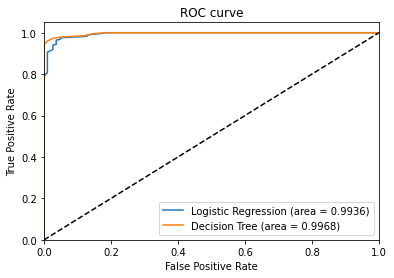

In [90]:
plot_roc_curve(Logistic_model, label='Logistic Regression')
plot_roc_curve(DecisionTree_Model, label='Decision Tree')
show_roc_curve()

**Conclusion**

Based on the results from our 3 ML models we can see the best fitting model for our trained data from variables Breathing Problem, Fever,Dry Cough, Sore throat, Abroad travel, Contact with Covid19 Patient, Attended Large Gathering, Visited Public Exposed Places and Family working in Public Exposed Places for our dependent variable COVID-19 is Logistic regression though Decision tree is also nearby to value approximately equals to same as Logistic. Also from Area under the curve analysis we can say for my Logistic regression model, there is 99.36 % chances of correct predictions whereas with decision tree 99.68% correct predictions can be made.